In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Dataset/Outlier.csv')
df.sample(5)

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
3227,3227,3227,NaN,Female,36953,33.0,Tokyo,0
1277,1277,1277,20.0,Male,119638,14.0,London,2
4609,4609,4609,43.0,Female,149130,44.0,London,1
2152,2152,2152,NaN,Female,3776,14.0,Miami,1
1323,1323,1323,31.0,Female,55424,8.0,Tokyo,0


<Axes: xlabel='days_on_platform', ylabel='Count'>

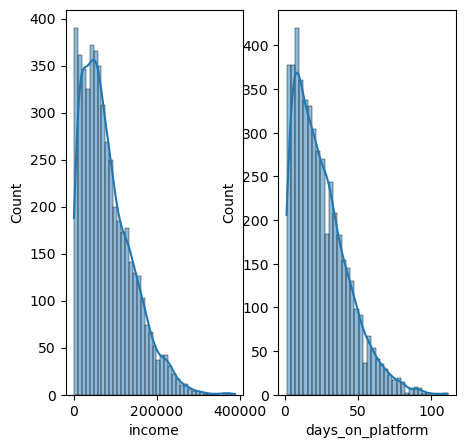

In [5]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 6, 1)
sns.histplot(df['income'], kde=True)

plt.subplot(1, 6, 2)
sns.histplot(df['days_on_platform'], kde=True)

In [9]:
print(df['income'].skew())
print(df['days_on_platform'].skew())

1.0272424013453245
1.0259145772027911


In [11]:
df['income'].describe()

count      5000.000000
mean      79593.336200
std       60304.056095
min           4.000000
25%       32752.500000
50%       65989.000000
75%      115406.500000
max      388572.000000
Name: income, dtype: float64

<Axes: ylabel='income'>

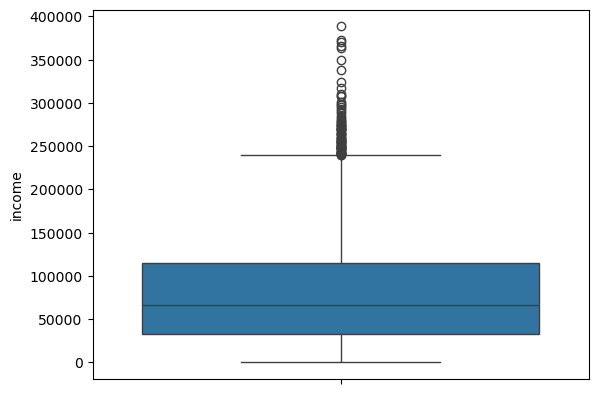

In [15]:
sns.boxplot(df['income'])

In [17]:
per25 = df['income'].quantile(0.25)
per75 = df['income'].quantile(0.75)

In [19]:
print(per25)
print(per75)

32752.5
115406.5


In [23]:
IQR = per75 - per25
IQR

82654.0

In [25]:
upper_limit = per75 + 1.5*IQR
lower_limit = per25 - 1.5*IQR
print("The Upper Limit is:", upper_limit)
print("The Lower limit is:", lower_limit)

The Upper Limit is: 239387.5
The Lower limit is: -91228.5


In [27]:
df[df['income'] > upper_limit]

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
50,50,50,36.0,Male,255965,22.0,Tokyo,1
96,96,96,NaN,Male,279792,36.0,London,4
200,200,200,46.0,Female,309902,51.0,Tokyo,0
249,249,249,NaN,Female,265599,58.0,London,1
423,423,423,43.0,Female,263840,49.0,London,0
...,...,...,...,...,...,...,...,...
4198,4198,4198,NaN,Female,273579,51.0,New York City,1
4383,4383,4383,11.0,Male,308439,25.0,New York City,0
4723,4723,4723,27.0,Male,264791,14.0,New York City,0
4778,4778,4778,11.0,Male,282909,25.0,Miami,0


In [31]:
df[df['income'] < lower_limit]

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases


In [33]:
changed_df = df[df['income'] > upper_limit]
changed_df.shape

(77, 8)

<Axes: ylabel='income'>

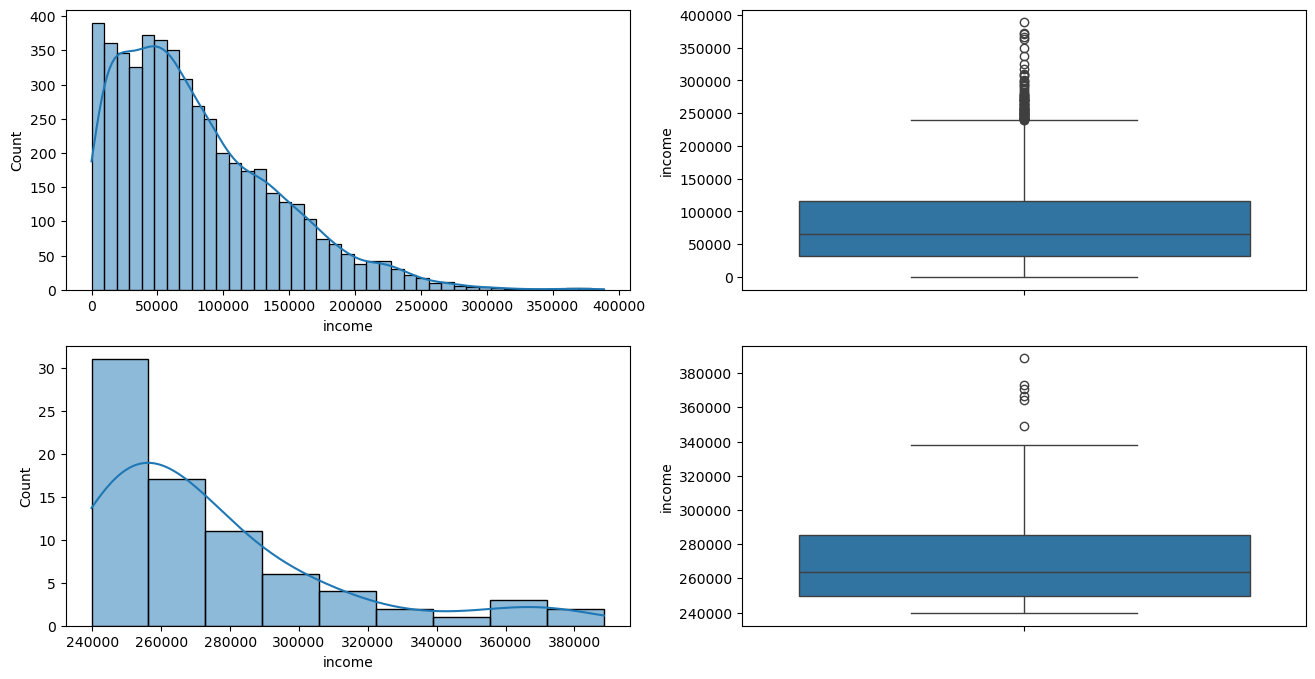

In [47]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['income'], kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(df['income'])

plt.subplot(2, 2, 3)
sns.histplot(changed_df['income'], kde=True)

plt.subplot(2, 2, 4)
sns.boxplot(changed_df['income'])

In [49]:
# The outliers you see in the boxplot for changed_df (the data after removing outliers) are new outliers that were created because the quartiles 
# (Q1 and Q3) and the Interquartile Range (IQR) of the dataset have recalculated based on the new, smaller dataset.

In [51]:
df_new = df.copy()

df_new['income'] = np.where(
    df['income']>upper_limit,
    upper_limit,
    np.where(
        df['income']<lower_limit,
        lower_limit,
        df['income']
    )
)

<Axes: ylabel='income'>

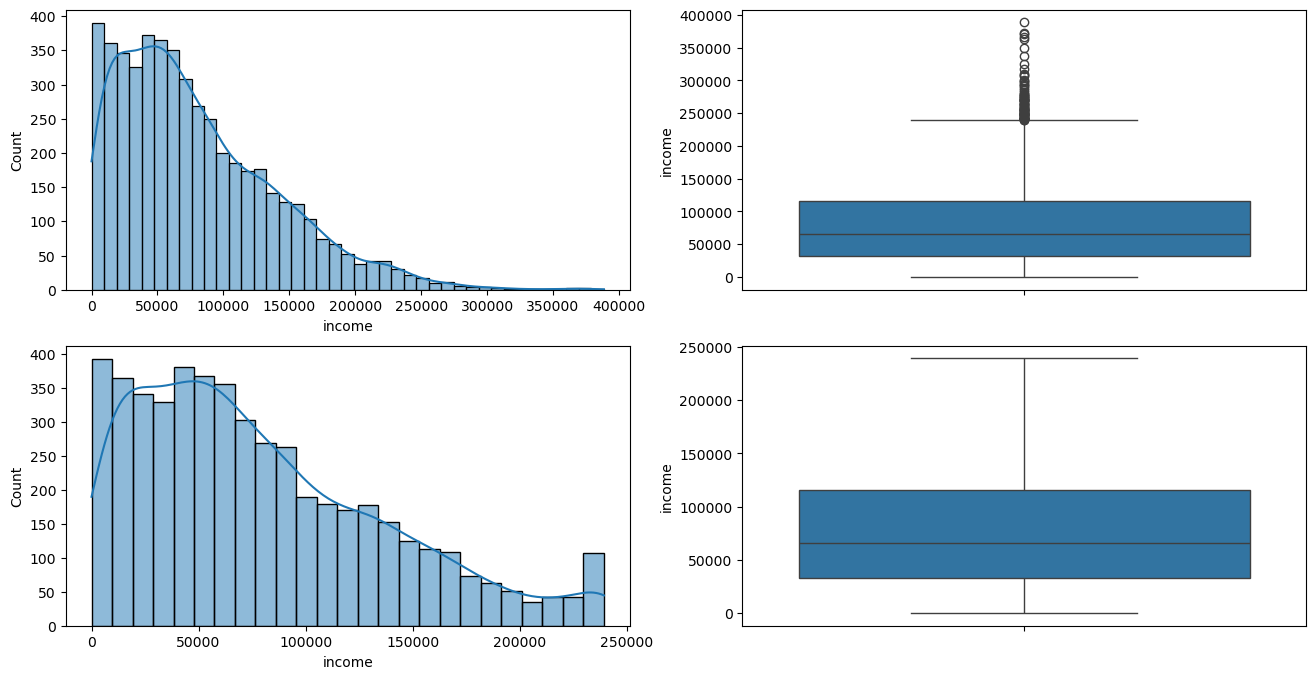

In [53]:
 plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['income'], kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(df['income'])

plt.subplot(2, 2, 3)
sns.histplot(df_new['income'], kde=True)

plt.subplot(2, 2, 4)
sns.boxplot(df_new['income'])